# 📊 Homicidios y asesinatos - Ministerio del Interior

En este notebook se realizará un análisis exploratorio de los datos abiertos obtenidos del Ministerio de Interior del Ecuador respecto a los homiciodios y asesinatos registrados en el 2014.

## 1. Definción del Problema

> Mediante el análisis exploratorios se responderán a algunas preguntas tales como:
  Cantidad de asesinatos por ubicación, sexo, tipo de muerte y en diferentes periodos     de tiempo.


## 2. Datos

Existe un archivo con información referente a los levantamientos de cadaver que han sido determinados como homicidios y asesinatos en el 2014 Homicidios y asesinatos - Ministerio del Interior que puede ser descargado en el siguiente [link de Datos Abiertos del Ecuador](http://catalogo.datosabiertos.gob.ec/dataset/homicidios-y-asesinatos). 

Este archivo está estructurado de la siguiente manera: 

* Núm. de observaciones: 	1309
* Núm de atributos: 		12

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importar homicidios.csv
homicidios_ecu = pd.read_csv("homicidios.csv", parse_dates=["Fecha Infraccion"])
homicidios_ecu.drop("Unnamed: 0", 1, inplace=True)
homicidios_ecu.head()

,Zona,Provincia,Canton,Distrito,Circuito,Fecha Infraccion,Hora Infraccion,tipo_muert_matriz,Edad,Sexo,Estado Civil,Nacionalidad
0,ZONA 1,ESMERALDAS,ESMERALDAS,ESMERALDAS,CENTRO,2014-04-30,13:40,Homicidios,22.0,MASCULINO,SOLTERO,ECUADOR
1,ZONA 6,AZUAY,SEVILLA_DE_ORO,PAUTE,SEVILLA DE ORO,2014-04-30,NaN,Homicidios,51.0,MASCULINO,SOLTERO,ECUADOR
2,ZONA 5,LOS_RIOS,QUEVEDO,QUEVEDO,DIVINO NIÑO,2014-02-05,4:30,Femicidios,36.0,FEMENINO,SOLTERO,ECUADOR
3,ZONA 8,GUAYAS,GUAYAQUIL,FLORIDA,MAPASINGUE,2014-02-05,1:00,Asesinatos,17.0,MASCULINO,SOLTERO,ECUADOR
4,ZONA 7,LOJA,GONZANAMA,CALVAS,GONZANAMA,2014-03-05,19:50,Asesinatos,20.0,MASCULINO,SOLTERO,ECUADOR


## EDA (Análisis Exploratorio de Datos)

In [3]:
# Información básica acerca del dataframe
homicidios_ecu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Zona               1309 non-null   object        
 1   Provincia          1309 non-null   object        
 2   Canton             1309 non-null   object        
 3   Distrito           1309 non-null   object        
 4   Circuito           1309 non-null   object        
 5   Fecha Infraccion   1309 non-null   datetime64[ns]
 6   Hora Infraccion    1298 non-null   object        
 7   tipo_muert_matriz  1309 non-null   object        
 8   Edad               1284 non-null   float64       
 9   Sexo               1309 non-null   object        
 10  Estado Civil       1309 non-null   object        
 11  Nacionalidad       1309 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 122.8+ KB


Este dataframe tiene 1309 observarciones y 12 columnas. La mayoría de variables son del tipo `object`, excepto `Fecha Infraccion` que es del tipo datetime y `Edad` que es del tipo float.

In [4]:
# Revisión de Missing Values
homicidios_ecu.isna().sum()/len(homicidios_ecu)

Zona                 0.000000
Provincia            0.000000
Canton               0.000000
Distrito             0.000000
Circuito             0.000000
Fecha Infraccion     0.000000
Hora Infraccion      0.008403
tipo_muert_matriz    0.000000
Edad                 0.019099
Sexo                 0.000000
Estado Civil         0.000000
Nacionalidad         0.000000
dtype: float64

Solamente las variables `Hora Infraccion` y `Edad` tienen missing values; sin embargo, la cantidad es baja ya que apenas representan el 0.84% y 1.9% respectivamente.

In [5]:
# Sumario estadístico de la variable cuantitativa 'Edad'
homicidios_ecu["Edad"].describe()

count    1284.000000
mean       34.323209
std        15.086988
min         0.000000
25%        24.000000
50%        31.000000
75%        42.000000
max        92.000000
Name: Edad, dtype: float64

En el 2014, en promedio, la edad de las personas asesinadas fue de 34.23 años.

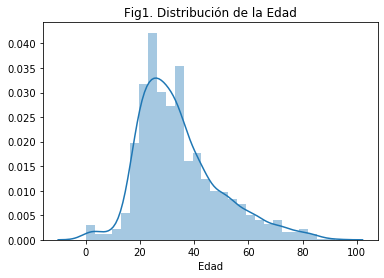

In [6]:
# Gráfico de la distribución de la variable 'Edad'
sns.distplot(homicidios_ecu.Edad)

plt.title("Fig1. Distribución de la Edad")
plt.xlabel("Edad");

La variable `Edad` es right skewed, como se aprecia en la Figura 1.

In [7]:
# Ordernar el dataframe por fecha
homicidios_ecu.sort_values(by = ["Fecha Infraccion"], inplace=True, ascending=True)
homicidios_ecu["Fecha Infraccion"].tail(10)

1280   2014-12-30
1297   2014-12-31
1278   2014-12-31
1277   2014-12-31
1276   2014-12-31
1275   2014-12-31
1274   2014-12-31
1273   2014-12-31
1272   2014-12-31
1296   2014-12-31
Name: Fecha Infraccion, dtype: datetime64[ns]

In [8]:
# Incluir atributos de fecha respecto a la variable 'Fecha Infraccion'
homicidios_ecu["Año_Infraccion"] = homicidios_ecu["Fecha Infraccion"].dt.year
homicidios_ecu["Mes_Infraccion"] = homicidios_ecu["Fecha Infraccion"].dt.month
homicidios_ecu["Dia_Infraccion"] = homicidios_ecu["Fecha Infraccion"].dt.dayofweek

homicidios_ecu.head()

,Zona,Provincia,Canton,Distrito,Circuito,Fecha Infraccion,Hora Infraccion,tipo_muert_matriz,Edad,Sexo,Estado Civil,Nacionalidad,Año_Infraccion,Mes_Infraccion,Dia_Infraccion
972,ZONA 5,LOS_RIOS,QUEVEDO,QUEVEDO,7 DE OCTUBRE,2014-01-01,4:00,Asesinatos,30.0,MASCULINO,SOLTERO,ECUADOR,2014,1,2
268,ZONA 1,CARCHI,TULCAN,TULCAN,JULIO ANDRADE,2014-01-01,3:00,Homicidios,34.0,MASCULINO,SOLTERO,ECUADOR,2014,1,2
230,ZONA 1,SUCUMBIOS,LAGO_AGRIO,LAGO AGRIO,GENERAL FARFAN,2014-01-01,1:00,Asesinatos,80.0,MASCULINO,VIUDO,ECUADOR,2014,1,2
270,ZONA 1,CARCHI,TULCAN,TULCAN,KENNEDY,2014-01-01,7:00,Homicidios,26.0,MASCULINO,SOLTERO,ECUADOR,2014,1,2
346,ZONA 3,CHIMBORAZO,RIOBAMBA,RIOBAMBA,LA CONDAMINE,2014-01-01,9:00,Asesinatos,31.0,MASCULINO,SOLTERO,ECUADOR,2014,1,2


## Cantidad de homicidios por Provincia

In [9]:
homicidios_ecu["Provincia"].value_counts()

GUAYAS                            383
PICHINCHA                         167
LOS_RIOS                          141
ESMERALDAS                        132
MANABI                             91
EL_ORO                             78
SANTO_DOMINGO_DE_LOS_TSACHILAS     53
SUCUMBIOS                          45
AZUAY                              37
ORELLANA                           23
IMBABURA                           23
CANAR                              21
LOJA                               17
COTOPAXI                           16
CHIMBORAZO                         15
TUNGURAHUA                         11
BOLIVAR                            10
NAPO                               10
SANTA_ELENA                         9
CARCHI                              9
PASTAZA                             7
MORONA_SANTIAGO                     7
ZAMORA_CHINCHIPE                    4
Name: Provincia, dtype: int64

Las tres provincias con mayor número de asesinatos en el 2014 fueron: Guayas, Pichincha y Los Rios.

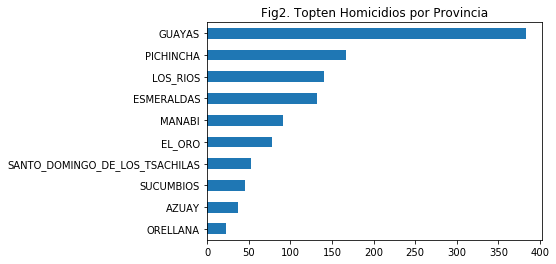

In [10]:
# Barplot de homicidios por Sexo
homicidios_ecu["Provincia"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh")
plt.title("Fig2. Topten Homicidios por Provincia");

La figura 2 muestra las 10 provincias con mayor número de asesinatos.

## Cantidad de homicidios por Sexo

In [11]:
homicidios_ecu["Sexo"].value_counts()

MASCULINO    1123
FEMENINO      186
Name: Sexo, dtype: int64

Han sido asesinados 1123 hombres y 186 mujeres.

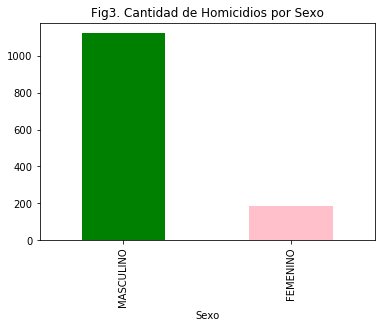

In [12]:
# Barplot de homicidios por Sexo
homicidios_ecu["Sexo"].value_counts().plot(kind="bar", color=['green', 'pink'])
plt.title("Fig3. Cantidad de Homicidios por Sexo")
plt.xlabel("Sexo");

Fueron mas los casos de asesinatos de hombres que de mujeres en el 2014.

## Cantidad de homicidios por Tipo de Muerte

In [13]:
homicidios_ecu["tipo_muert_matriz"].value_counts()

Asesinatos    840
Homicidios    407
Femicidios     32
Sicariatos     30
Name: tipo_muert_matriz, dtype: int64

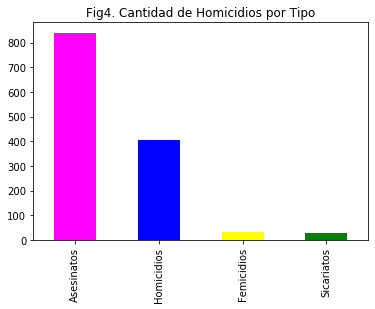

In [14]:
# Barplot de homicidios por Tipo de Muerte
homicidios_ecu["tipo_muert_matriz"].value_counts().plot(kind="bar", color=['magenta', 'blue', 'yellow', 'green'])
plt.title("Fig4. Cantidad de Homicidios por Tipo");

Respecto al tipo de muerte, los asesinatos fueron los que mayor cantidad presentaron en el 2014.

## Cantidad de homicidios por Mes

In [15]:
homicidios_ecu["Mes_Infraccion"].value_counts()

1     148
8     120
3     119
12    116
4     114
7     107
11    104
5     104
2     102
6      95
10     91
9      89
Name: Mes_Infraccion, dtype: int64

Los meses de Enero (1), Agosto (8) y Marzo (3), fueron los meses que mas homicidios se reportaron en el 2014.

## Cantidad de homicidios por dia de la semana

In [16]:
homicidios_ecu["Dia_Infraccion"].value_counts()

6    240
5    202
4    191
2    188
0    179
3    168
1    141
Name: Dia_Infraccion, dtype: int64

Teniendo en cuenta que Lunes=0 y Domingo=6, los dias con mayor cantidad de homicidios en el 2014 fueron Domingo, Sábado y Viernes.

## Gráficos del promedio de la Edad por Mes y Dia de la Semana

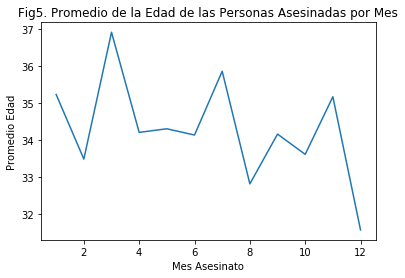

In [17]:
# Gráfico del promedio de 'Edad' por Mes
homicidios_ecu.groupby('Mes_Infraccion').mean()['Edad'].plot()

plt.title("Fig5. Promedio de la Edad de las Personas Asesinadas por Mes")
plt.xlabel("Mes Asesinato")
plt.ylabel("Promedio Edad");

En Abril del 2014, la edad de las personas asesinadas fue de 37 años en promedio.

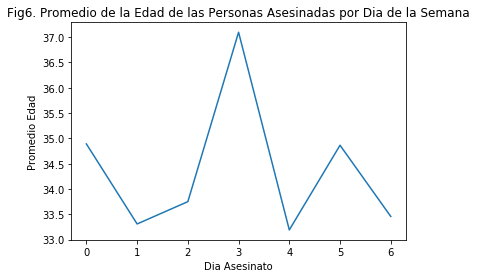

In [18]:
# Gráfico del promedio de 'Edad' por Dia de la Semana
homicidios_ecu.groupby('Dia_Infraccion').mean()['Edad'].plot()

plt.title("Fig6. Promedio de la Edad de las Personas Asesinadas por Dia de la Semana")
plt.xlabel("Dia Asesinato")
plt.ylabel("Promedio Edad");

Respecto a los días de la semana, el día jueves se registra que la edad en promedio de las personas que fueron asesinadas fue de 37 años.

## Gráfico del promedio de la Edad por Zona

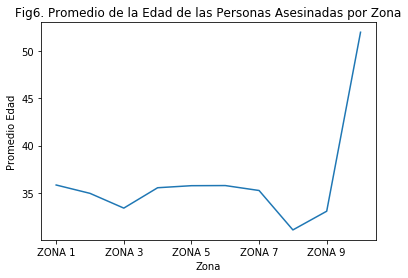

In [19]:
# Gráfico del promedio de 'Edad' por Zona
homicidios_ecu.groupby('Zona').mean()['Edad'].plot()

plt.title("Fig6. Promedio de la Edad de las Personas Asesinadas por Zona")
plt.xlabel("Zona")
plt.ylabel("Promedio Edad");

## Cantidad de homicidios por Nacionalidad y Estado Civil

In [20]:
homicidios_ecu["Nacionalidad"].value_counts()

ECUADOR                                               1269
COLOMBIA                                                30
PERU                                                     3
NO DETERMINADO                                           2
OTROS                                                    2
CHILE                                                    1
FRANCIA                                                  1
REPUBLICA DOMINICANA                                     1
Name: Nacionalidad, dtype: int64

Se aprecia que si bien la mayor cantidad de asesinatos fueron cometidos contra ciudadanos ecuatorianos, también se registran casos de otras nacionalidades tanto de América como de Europa.

In [21]:
homicidios_ecu["Estado Civil"].value_counts()

SOLTERO           938
CASADO            227
UNION LIBRE        53
DIVORCIADO         42
NO DETERMINADO     31
VIUDO              18
Name: Estado Civil, dtype: int64

En lo que respecta al estado civil, la mayor cantidad de homicidios fueron cometidos en contra de personas solteras.